# Data Cleaning Functions #

Description:

This notebook holds a bunch of my cleaning functions. I'm sure there was a much more elegant way to do all of this cleaning. I chose to clean just the data I am using for the most part rather than bulk applying. Something to re-visit for future projects.

### Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

#### Read in Data Sets

In [2]:
s_train = pd.read_csv('datasets/train.csv')
s_test = pd.read_csv('datasets/test.csv')

### Start Cleaning

In [3]:
# Header Cleaining Script
def clean_header(df):
    
    '''This function removes wierd characters and spaces from columns and keeps everything lowercase'''
    
    df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')','')

In [4]:
# Run clean header script on train and test data sets
clean_header(s_train)
clean_header(s_test)

# Check Data
s_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [5]:
# Check for null values
s_train.isnull().sum()

id                0
pid               0
ms_subclass       0
ms_zoning         0
lot_frontage    330
               ... 
misc_val          0
mo_sold           0
yr_sold           0
sale_type         0
saleprice         0
Length: 81, dtype: int64

## Initial Visualizations to look at correlations

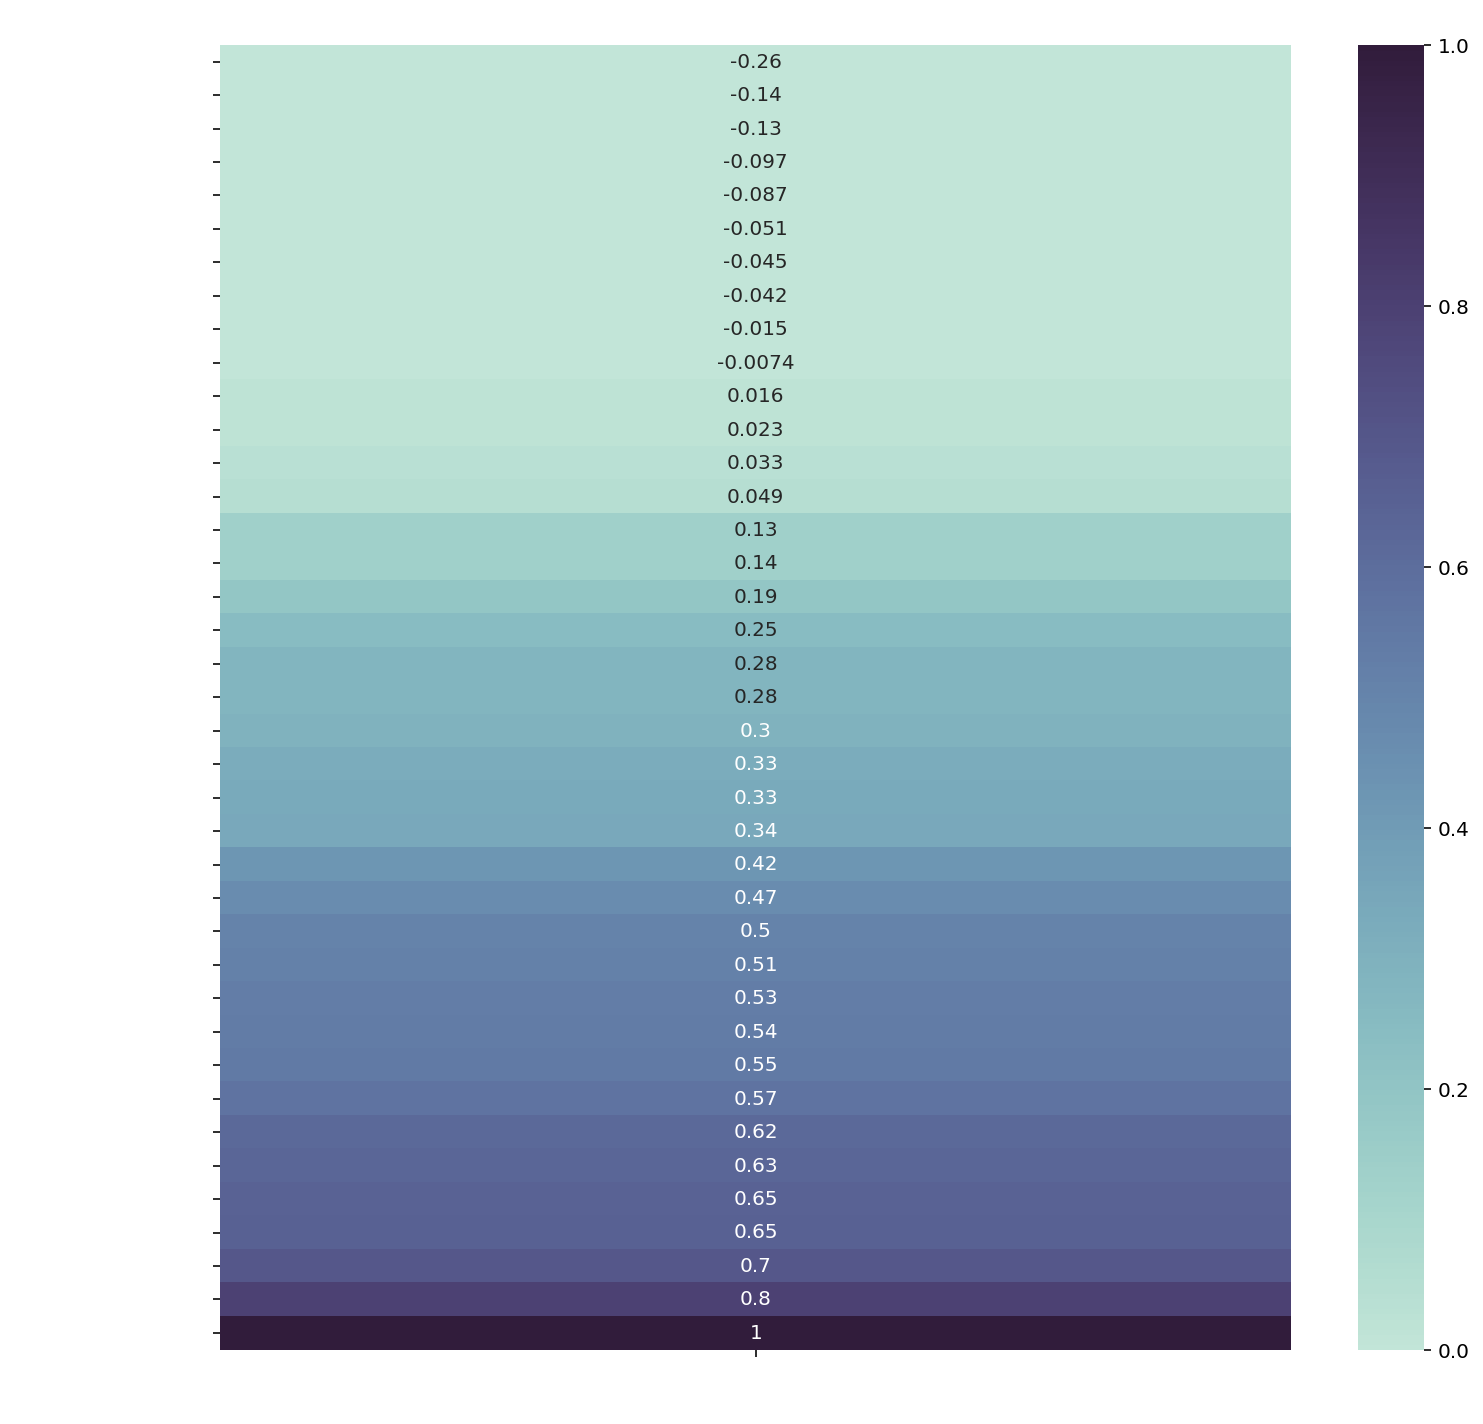

In [6]:
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
plt.figure(figsize = (12,12))
sns.heatmap(s_train.corr()[['saleprice']].sort_values('saleprice'), vmin=0, vmax=1, annot=True,cmap = cmap)
plt.title('Correlation Heatmap', color='white')
plt.xlabel('Sale Price', color='white')
plt.ylabel('Features', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.savefig('datasets/correlation_heatmap_graph', transparent=True);

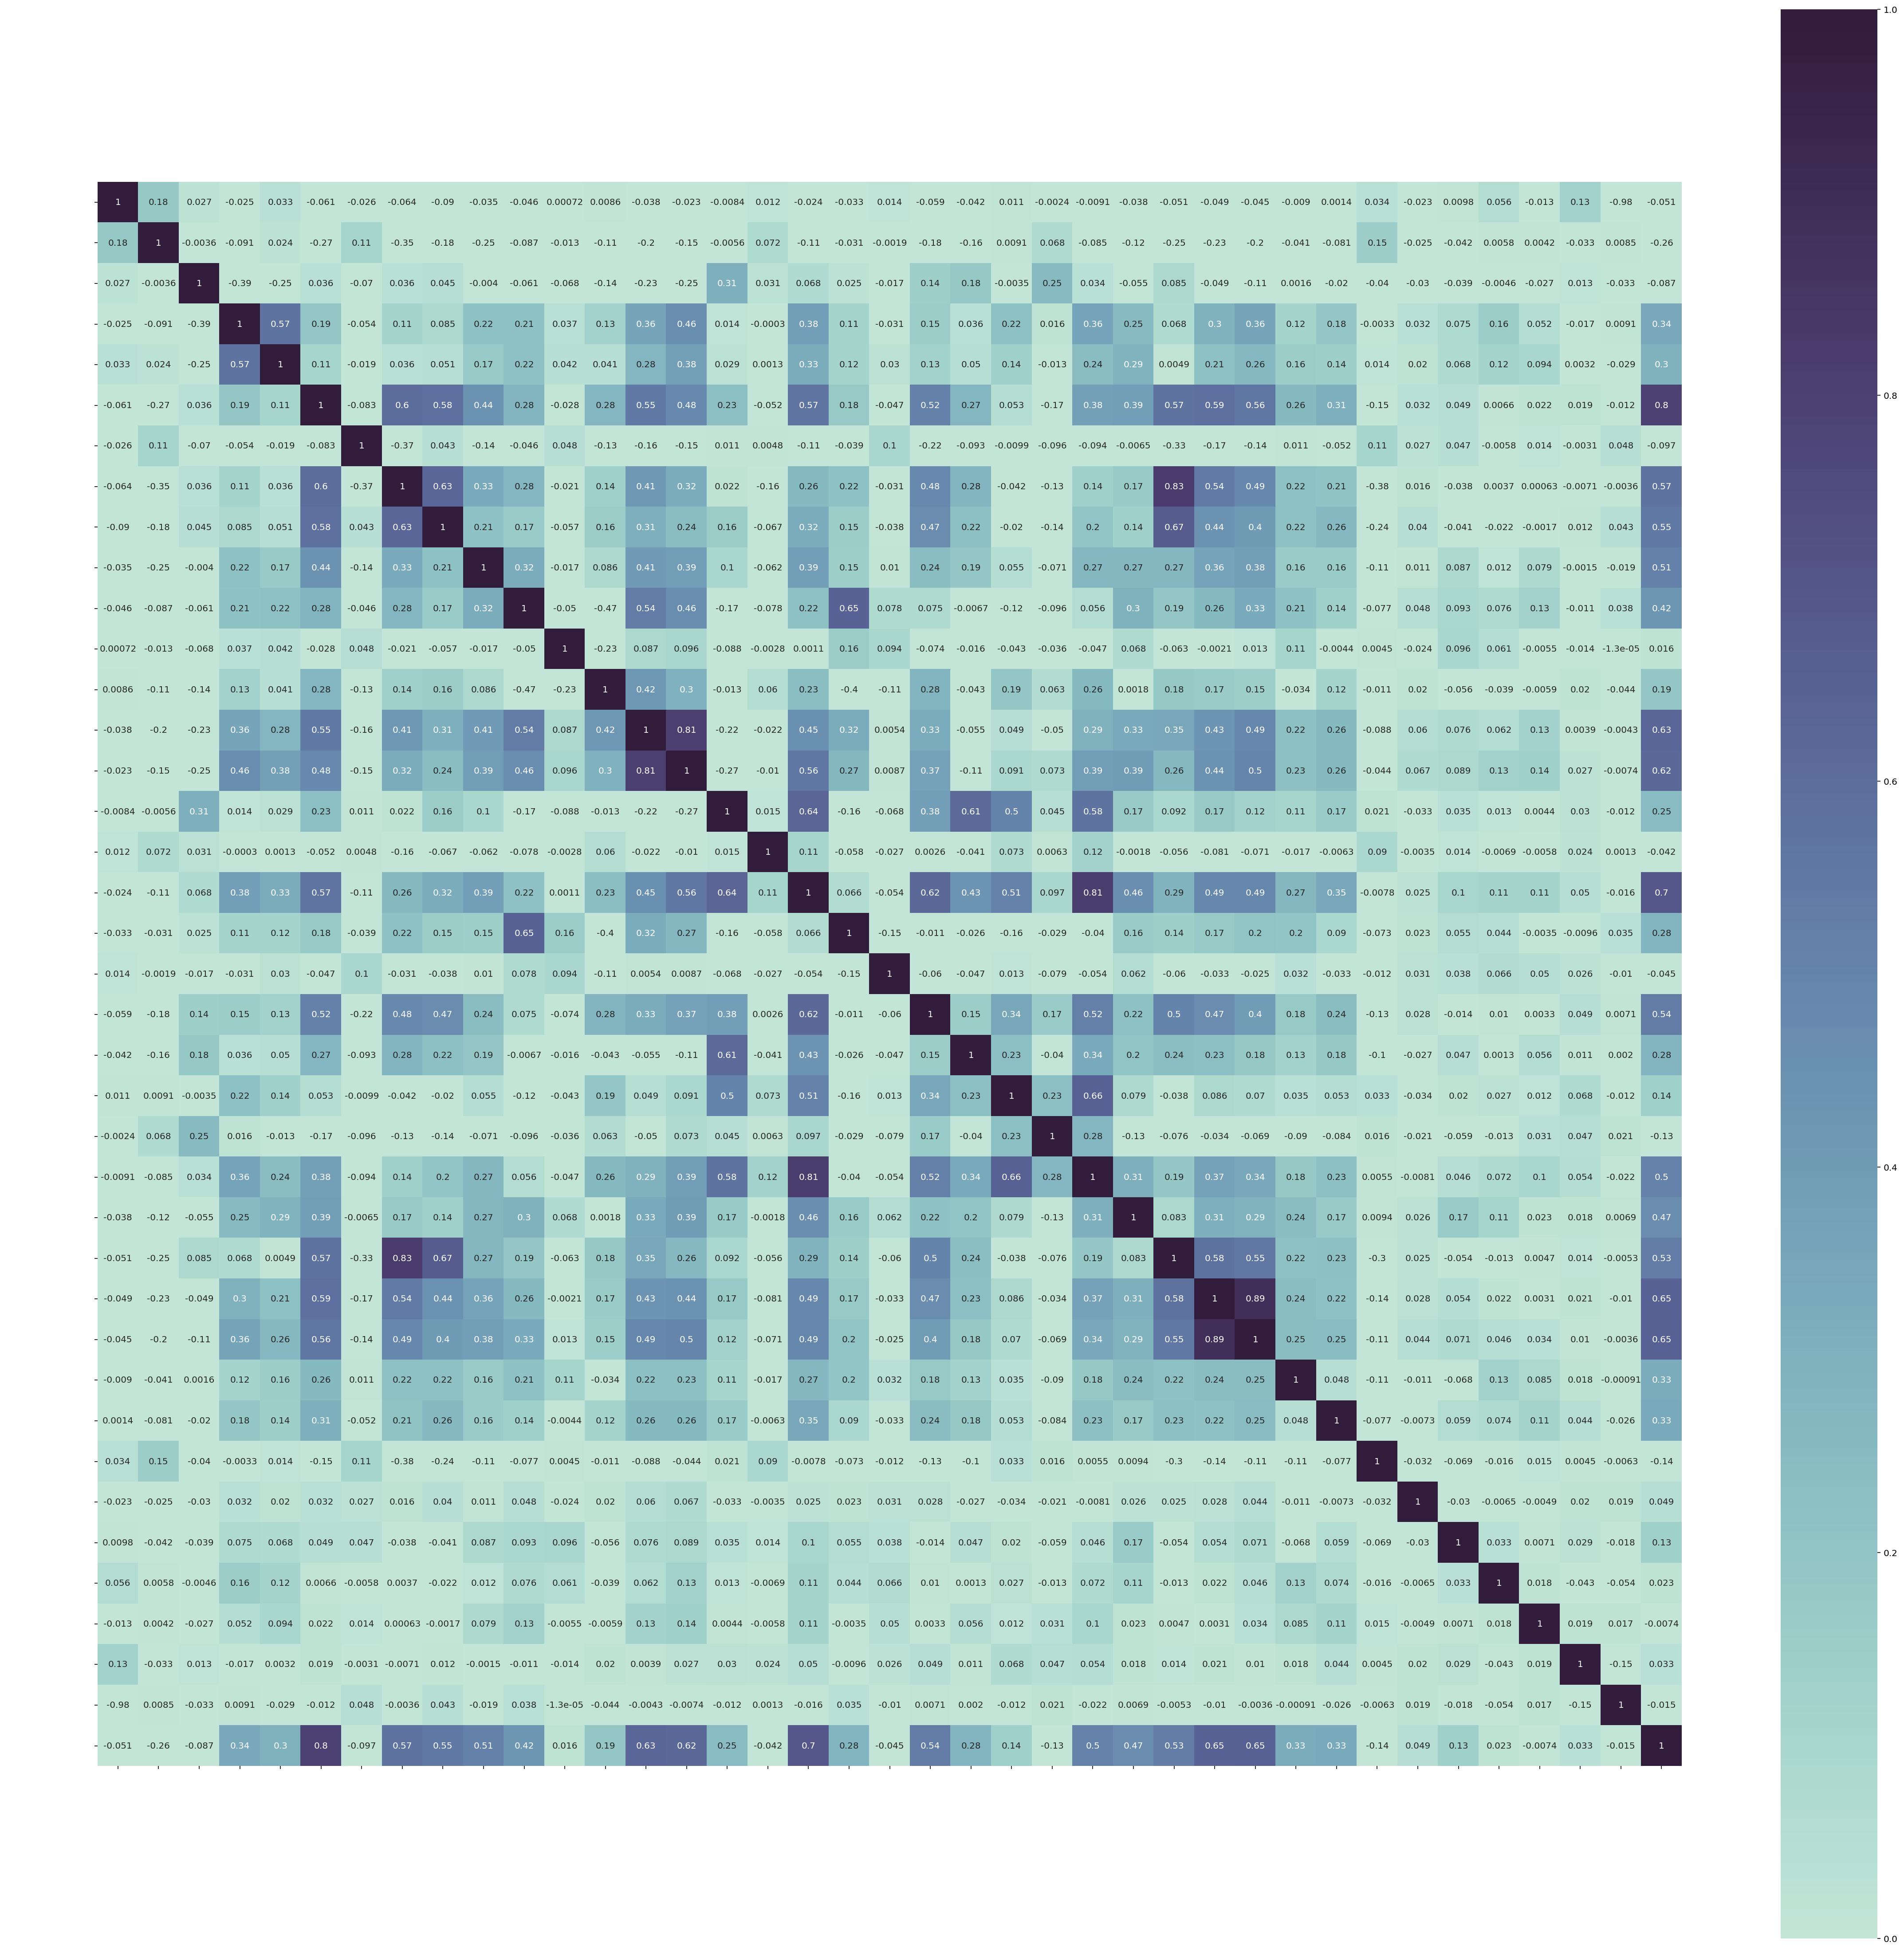

In [7]:
# Let's do a heatmap to see if we can see correlations otherwise!
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)

corr = s_train.corr()
f, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(corr, vmin=0, vmax=1, annot=True, square=True, cmap=cmap)
plt.title('Mega Heatmap', color='white')
plt.xlabel('Features', color='white')
plt.ylabel('Features', color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.savefig('datasets/meaga_heatmap_graph', transparent=True);

## Start Preprocessing and Cleaning

Preprocessing for data sets I wanted to test

In [8]:
# lower and fill na for quality items 
s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].apply(lambda x: x.astype(str).str.lower().fillna(0))
s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].apply(lambda x: x.astype(str).str.lower().fillna(0))

In [9]:
# check data
s_test['exter_qual'].head()

0    ta
1    ta
2    gd
3    gd
4    ta
Name: exter_qual, dtype: object

In [10]:
# Changing like qualitative data to numeric for easier analysis  for quality items
s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_train[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].replace({'ex':1, 'gd':2, 'ta':3, 'fa':4, 'po':5, 'na':0, 'nan':0}).fillna(0)
s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']] = s_test[['exter_qual', 'exter_cond', 'bsmt_qual', 'bsmt_cond', 'kitchen_qual', 'garage_qual', 'garage_cond']].replace({'ex':1, 'gd':2, 'ta':3, 'fa':4, 'po':5, 'na':0, 'nan':0}).fillna(0)

In [11]:
s_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [12]:
s_test.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type
0,2658,902301120,190,RM,69.0,9142,Pave,Grvl,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,4,2006,WD
1,2718,905108090,90,RL,NaN,9662,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,8,2006,WD
2,2414,528218130,60,RL,58.0,17104,Pave,NaN,IR1,Lvl,...,0,0,0,NaN,NaN,NaN,0,9,2006,New
3,1989,902207150,30,RM,60.0,8520,Pave,NaN,Reg,Lvl,...,0,0,0,NaN,NaN,NaN,0,7,2007,WD
4,625,535105100,20,RL,NaN,9500,Pave,NaN,IR1,Lvl,...,0,185,0,NaN,NaN,NaN,0,7,2009,WD


In [13]:
# Creating a lots data frame with lot information
df_lots = s_train[['lot_frontage', 'lot_area', 'lot_config', 'lot_shape']].fillna(0)

In [14]:
df_lots.head()

,lot_frontage,lot_area,lot_config,lot_shape
0,0.0,13517,CulDSac,IR1
1,43.0,11492,CulDSac,IR1
2,68.0,7922,Inside,Reg
3,73.0,9802,Inside,Reg
4,82.0,14235,Inside,IR1


In [15]:
# Check null values again
s_train['lot_frontage'].isnull().sum()

330

In [16]:

s_train['lot_frontage'] = s_train['lot_frontage'].fillna(0)
s_test['lot_frontage'] = s_test['lot_frontage'].fillna(0)

In [17]:
s_train['lot_frontage'].isnull().sum()

0

In [18]:
s_test['lot_frontage'].isnull().sum()

0

In [19]:
s_train['lot_config'] =  s_train['lot_config'].map(lambda x: x.lower())
# s_test['lot_config'] = map(str.lower, s_test.lot_config)
# df['lower_desc'] = map(lambda x: x.lower(), df['Description']) print df lower() 
s_train['lot_config']

0       culdsac
1       culdsac
2        inside
3        inside
4        inside
         ...   
2046     inside
2047     inside
2048     inside
2049     corner
2050     inside
Name: lot_config, Length: 2051, dtype: object

In [20]:
s_test['lot_config'] =  s_test['lot_config'].map(lambda x: x.lower())

In [21]:
s_train['lot_config'].unique()

array(['culdsac', 'inside', 'corner', 'fr2', 'fr3'], dtype=object)

In [22]:
s_test['lot_config'].unique()

array(['inside', 'culdsac', 'corner', 'fr2', 'fr3'], dtype=object)

### Translate objects to numerica data where possible

In [23]:
# Replace lot_config data with #s
s_train[['lot_config']] = s_train[['lot_config']].replace({'inside':1, 'corner':2, 'culdsac':3, 'fr2':4, 'fr3':5}).fillna(0)
s_test[['lot_config']] = s_test[['lot_config']].replace({'inside':1, 'corner':2, 'culdsac':3, 'fr2':4, 'fr3':5}).fillna(0)

In [24]:
# Check training data
s_train['lot_config'].unique()

array([3, 1, 2, 4, 5])

In [25]:
# Check test data
s_test['lot_config'].unique()

array([1, 3, 2, 4, 5])

In [26]:
# Lot_shape had funky data, changed to lowercase for easier cleaning
s_train['lot_shape'] =  s_train['lot_shape'].map(lambda x: x.lower())
s_test['lot_shape'] =  s_test['lot_shape'].map(lambda x: x.lower())

In [27]:
# Replace lot_shape data with #s
s_train[['lot_shape']] = s_train[['lot_shape']].replace({'reg':1, 'ir1':2, 'ir2':3, 'ir3':4}).fillna(0)
s_test[['lot_shape']] = s_test[['lot_shape']].replace({'reg':1, 'ir1':2, 'ir2':3, 'ir3':4}).fillna(0)

In [28]:
# Check for nulls
s_train[['lot_config']].isnull().sum()

lot_config    0
dtype: int64

## Fill NANs where needed

#### I tried to chain this together, and probably should have just run it on the whole dataset but wanted to be able to pull rows that had too much null data to be useful. 

In [29]:
# Fill nans
s_train['garage_area'] = s_train['garage_area'].fillna(0)
s_test['garage_area'] = s_test['garage_area'].fillna(0)

In [30]:
# Fill nans
s_train['garage_cars'] = s_train['garage_cars'].fillna(0)
s_test['garage_cars'] = s_test['garage_cars'].fillna(0)

In [31]:
# Fill nans
s_train['total_bsmt_sf'] = s_train['total_bsmt_sf'].fillna(0)
s_test['total_bsmt_sf'] = s_test['total_bsmt_sf'].fillna(0)

In [32]:
# Fill nans
s_train['saleprice'] = s_train['saleprice'].fillna(0)

### Filter out major outliers ###

In [33]:
# Filter to keep saleprice between $50,000 and $400,000
s_train = s_train[(s_train['saleprice'] > 50000) & (s_train['saleprice'] < 400000)]

In [34]:
# Filter out ground living space less than 3000
s_train = s_train[s_train['gr_liv_area'] < 3000].fillna(0)

In [35]:
# Get rid of Unnamed column
s_test = s_test[s_test != 'unnamed']

In [36]:
# Check data
s_train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,...,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,0.0,13517,Pave,0,2,Lvl,...,0,0,0,0,0,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,0,2,Lvl,...,0,0,0,0,0,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,0,1,Lvl,...,0,0,0,0,0,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,0,1,Lvl,...,0,0,0,0,0,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,0,2,Lvl,...,0,0,0,0,0,0,3,2010,WD,138500


### Save Data Sets to CSV

In [37]:
# Save clean data sets to import 
clean_train = s_train

In [38]:
# Save clean data sets to import 
clean_test = s_test

In [39]:
# Export data to csv
clean_train.to_csv('datasets/clean_train.csv')
clean_test.to_csv('datasets/clean_test.csv')